In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from keras.optimizers import SGD, RMSprop, Adam
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'flowers Dataset/train'
valid_path = 'flowers Dataset/val'
test_path = 'flowers Dataset/test'

In [4]:
# useful for getting number of output classes
folders = glob('flowers Dataset/train/*')

In [5]:
folders

['flowers Dataset/train\\daisy',
 'flowers Dataset/train\\dandelion',
 'flowers Dataset/train\\rose',
 'flowers Dataset/train\\sunflower',
 'flowers Dataset/train\\tulip']

In [6]:
from tensorflow.keras.layers import BatchNormalization

In [7]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (224,224,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.BatchNormalization(),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.BatchNormalization(),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.BatchNormalization(),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(128,activation = 'relu'),
                                    tf.keras.layers.BatchNormalization(),
                                    ##
                                    tf.keras.layers.Dense(5,activation = 'softmax'),
                                    ])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 111, 111, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 54, 54, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        3

In [9]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [10]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   ) 
test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
train_generator = train_datagen.flow_from_directory('flowers Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 ) 

Found 2593 images belonging to 5 classes.


In [12]:
valid_generator = train_datagen.flow_from_directory('flowers Dataset/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical',
                                            ) 

Found 860 images belonging to 5 classes.


In [13]:
test_generator = test_datagen.flow_from_directory('flowers Dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 1,
                                            class_mode = 'categorical',
                                            shuffle = False,
                                            )

Found 870 images belonging to 5 classes.


In [14]:
from tensorflow.keras.callbacks import EarlyStopping

In [15]:
earlystopper=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=5, verbose=1,
    mode='auto', baseline=None, restore_best_weights=False
)

In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  train_generator,
  validation_data=valid_generator,
  epochs=20,
  steps_per_epoch=len(train_generator),
  validation_steps=len(valid_generator),
  callbacks = [earlystopper]
)

C:\Users\DELL\anaconda3\envs\marzharenv\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
82/82 [==============================] - 71s 689ms/step - loss: 1.3778 - accuracy: 0.5199 - val_loss: 2.8271 - val_accuracy: 0.2430
Epoch 2/20
82/82 [==============================] - 33s 399ms/step - loss: 0.9846 - accuracy: 0.6101 - val_loss: 3.0805 - val_accuracy: 0.2430
Epoch 3/20
82/82 [==============================] - 32s 395ms/step - loss: 0.8634 - accuracy: 0.6683 - val_loss: 2.1656 - val_accuracy: 0.2442
Epoch 4/20
82/82 [==============================] - 32s 394ms/step - loss: 0.8183 - accuracy: 0.6838 - val_loss: 2.2734 - val_accuracy: 0.2721
Epoch 5/20
82/82 [==============================] - 32s 393ms/step - loss: 0.7377 - accuracy: 0.7200 - val_loss: 1.5290 - val_accuracy: 0.3570
Epoch 6/20
82/82 [==============================] - 32s 396ms/step - loss: 0.6560 - accuracy: 0.7648 - val_loss: 1.3906 - val_accuracy: 0.4733
Epoch 7/20
82/82 [==============================] - 33s 398ms/step - loss: 0.6177 - accuracy: 0.7713 - val_loss: 1.0921 - val_accuracy: 0.5919

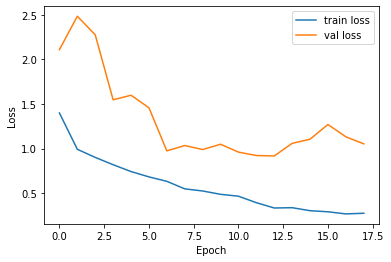

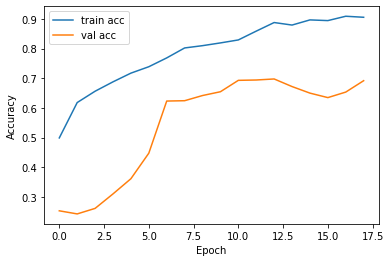

In [27]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [28]:
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

870/870 - 9s - loss: 1.0313 - accuracy: 0.6874

Test accuracy: 0.6873562932014465

Test loss: 1.0312526226043701


In [29]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score

In [30]:
from sklearn.preprocessing import LabelBinarizer

In [31]:
test_generator.reset()
# get the ground truth of your data. 
y_true = test_generator.classes 

# predict the probability distribution of the data
predictions = model.predict(test_generator, verbose=2)

# get the class with highest probability for each sample
y_pred = np.argmax(predictions, axis=1)

# get the classification report
print(classification_report(y_true, y_pred))

870/870 - 2s
              precision    recall  f1-score   support

           0       0.72      0.52      0.60       155
           1       0.69      0.83      0.75       211
           2       0.72      0.55      0.63       158
           3       0.64      0.90      0.75       148
           4       0.70      0.61      0.65       198

    accuracy                           0.69       870
   macro avg       0.69      0.68      0.68       870
weighted avg       0.69      0.69      0.68       870



In [32]:
print(confusion_matrix(y_true, y_pred))

[[ 81  38   6  22   8]
 [ 11 176   2  20   2]
 [ 10  10  87  12  39]
 [  1  12   0 133   2]
 [ 10  20  25  22 121]]


In [33]:
list(train_generator.class_indices.keys())

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

ROC AUC score: 0.8023440910034466


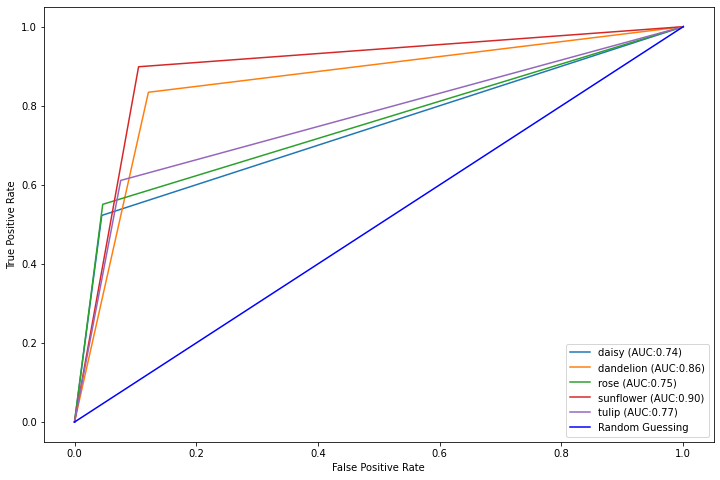

In [34]:
all_labels = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

def multiclass_roc_auc_score(y_true, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_true)
    y_true = lb.transform(y_true)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(all_labels):
        fpr, tpr, thresholds = roc_curve(y_true[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_true, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(y_true, y_pred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

In [35]:
# save it as a h5 file

from tensorflow.keras.models import load_model

model.save('Bunga weight/Deepbatchnorm_bunga.h5')

test accuracy : 68.73563218390805


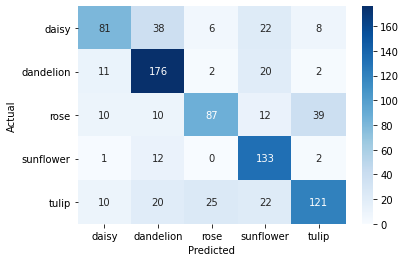

In [36]:
import pandas as pd
import seaborn as sn
import tensorflow as tf

model = tf.keras.models.load_model('Bunga weight/Deepbatchnorm_bunga.h5')
filenames = test_generator.filenames
nb_samples = len(test_generator)
y_prob=[]
y_act=[]
test_generator.reset()
for _ in range(nb_samples):
   X_test,Y_test = test_generator.next()
   y_prob.append(model.predict(X_test))
   y_act.append(Y_test)

predicted_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_act]

out_df = pd.DataFrame(np.vstack([predicted_class,actual_class]).T,columns=['predicted_class','actual_class'])
confusion_matrix = pd.crosstab(out_df['actual_class'],out_df['predicted_class'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix,cmap='Blues', annot=True,fmt='d')
plt.show
print('test accuracy : {}'.format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum().sum()*100)))